In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

data = pd.read_csv('https://raw.githubusercontent.com/HakkiKaanSimsek/Makine_Ogrenmesi_Dersleri/master/4.regresyon/ml_4a_lineer_regresyon/data/housing.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


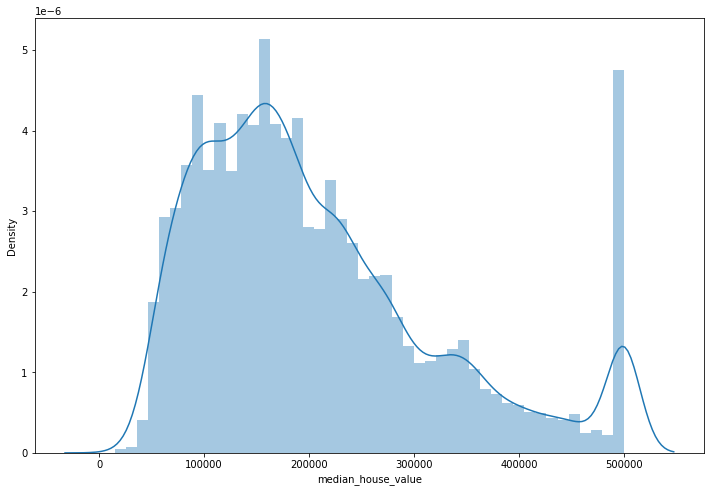

In [2]:
plt.figure(figsize=(12,8))
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']
sns.distplot(y)
plt.show()

In [3]:
X = pd.concat([X, pd.get_dummies(X.ocean_proximity)], axis=1)
X = X.drop(['ocean_proximity'],axis=1)
X['total_bedrooms'] = X['total_bedrooms'].fillna(X['total_bedrooms'].median())

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train, y_train)
print("R score: {0}".format(round(lm.score(X_train, y_train),2)))
print("Intercept: {0}".format(round(lm.intercept_),))
pd.DataFrame({'feature':X.columns, 'coef':lm.coef_})

R score: 0.65
Intercept: -2235604


,feature,coef
0,longitude,-26502.202398
1,latitude,-24915.560492
2,housing_median_age,1105.974805
3,total_rooms,-5.872325
4,total_bedrooms,105.721352
5,population,-37.326969
6,households,42.313211
7,median_income,39269.682428
8,<1H OCEAN,-18383.890550
9,INLAND,-59459.949854


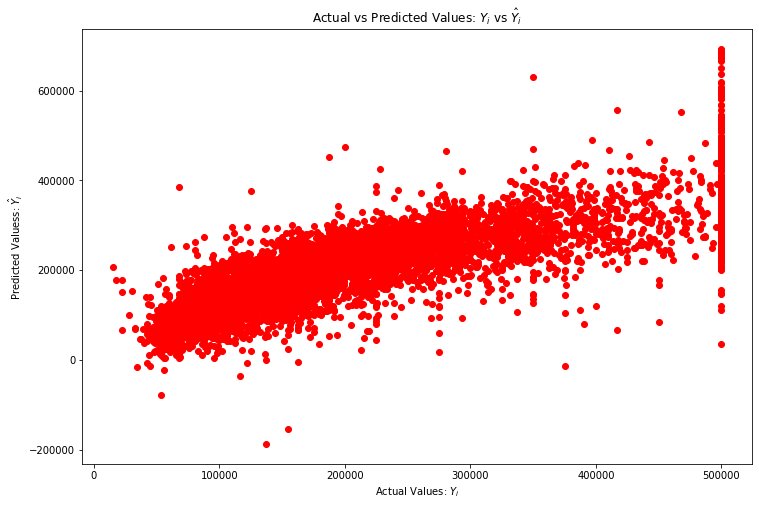

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, lm.predict(X_test), color='r')
plt.xlabel("Actual Values: $Y_i$")
plt.ylabel("Predicted Valuess: $\hat{Y}_i$")
plt.title("Actual vs Predicted Values: $Y_i$ vs $\hat{Y}_i$")
plt.show()

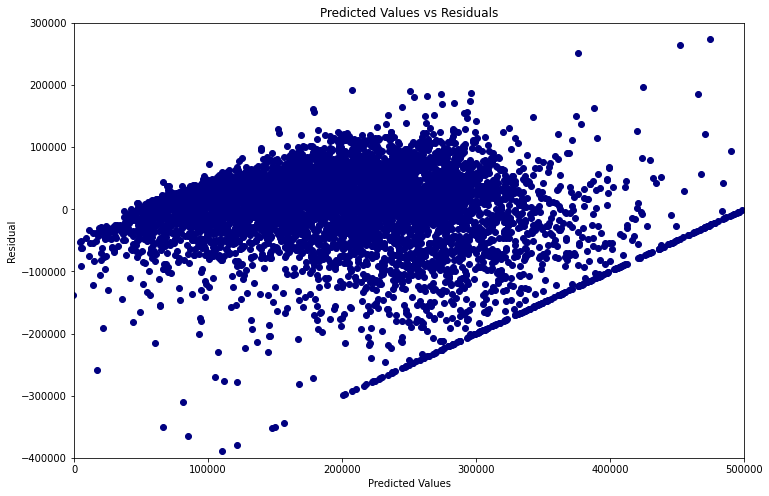

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c = 'navy')
plt.xlabel('Predicted Values')
plt.ylabel('Residual')
plt.title('Predicted Values vs Residuals')
plt.xlim(0,500000)
plt.ylim(-400000,300000)
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(lm.predict(X_test), y_test)
mse = mean_squared_error(lm.predict(X_test), y_test)
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

Mean Absolute Error (MAE): 50078.10
Mean Squared Error (MSE): 4733529273.09
Root Mean Squared Error (RMSE): 68800.65


In [6]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
print('Mean Absolute Error (MAE): %.2f' % mae)
print('Mean Squared Error (MSE): %.2f' % mse)
print('Root Mean Squared Error (RMSE): %.2f' % rmse)

model.summary()

Mean Absolute Error (MAE): 50078.10
Mean Squared Error (MSE): 4733529273.09
Root Mean Squared Error (RMSE): 68800.65


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2205.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:36:20   Log-Likelihood:            -1.8143e+05
No. Observations:               14448   AIC:                         3.629e+05
Df Residuals:                   14435   BIC:                         3.630e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude           -2.65e+04   1205.776    -21.979      0.000   -2.89e+04   -2.41e+04
latitude           -2.492e+04   1187.339    -20.984      0.000   -2.72e+04   -2.26e+04
housing_median_age  1105.9748     52.234     21.173      0.000    1003.589    1208.360
total_rooms           -5.8723      0.949     -6.186      0.000      -7.733      -4.012
total_bedrooms       105.7214      8.274     12.778      0.000      89.504     121.939
population           -37.3270      1.253    -29.780      0.000     -39.784     -34.870
households            42.3132      9.018      4.692      0.000      24.637      59.989
median_income       3.927e+04    401.730     97.751      0.000    3.85e+04    4.01e+04
<1H OCEAN          -2.254e+06   1.04e+05    -21.641      0.000   -2.46e+06   -2.05e+06
INLAND             -2.295e+06   1.03e+05    -22.297      0.000    -2.5e+06   -2.09e+06
ISLAND             -2.118e+06   1.11e+05    -19.156      0.000   -2.33e+06    -1.9e+06
NEAR BAY            -2.26e+06   1.05e+05    -21.591      0.000   -2.47e+06   -2.05e+06
NEAR OCEAN         -2.251e+06   1.05e+05    -21.525      0.000   -2.46e+06   -2.05e+06
==============================================================================
Omnibus:                     3686.550   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15157.085
Skew:                           1.208   Prob(JB):                         0.00
Kurtosis:                       7.398   Cond. No.                     1.61e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""